In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

In [3]:
ToplamHucreSayisi = pd.DataFrame([4075000,5075000,4000000,5700000,550000,6250000], columns = ["ToplamHucreSayisi"])

In [4]:
ToplamCanliHucreSayisi = pd.DataFrame([4025000,5025000,3900000,5700000,550000,6250000], columns = ["ToplamCanliHucreSayisi"])

In [5]:
ToplamOluHucreSayisi = pd.DataFrame([50000,50000,100000,0,0,0], columns = ["ToplamOluHucreSayisi"])

In [6]:
HucreCanliligi = pd.DataFrame([98.77300613,97.5,0,99.01477833,100,100], columns = ["HucreCanliligiYuzdesi"])

In [7]:
Dakika = pd.DataFrame(["3dk","3dk","3dk","10dk","10dk","10dk"], columns = ["Dakika"])

In [8]:
mles = pd.DataFrame(["ml2","ml4","ml6","ml2","ml4","ml6"] , columns = ["Mles"])

In [9]:
df = pd.concat([ToplamHucreSayisi,ToplamCanliHucreSayisi,ToplamOluHucreSayisi,HucreCanliligi,Dakika,mles] , axis = 1)

In [10]:
df

,ToplamHucreSayisi,ToplamCanliHucreSayisi,ToplamOluHucreSayisi,HucreCanliligiYuzdesi,Dakika,Mles
0,4075000,4025000,50000,98.773006,3dk,ml2
1,5075000,5025000,50000,97.500000,3dk,ml4
2,4000000,3900000,100000,0.000000,3dk,ml6
3,5700000,5700000,0,99.014778,10dk,ml2
4,550000,550000,0,100.000000,10dk,ml4
5,6250000,6250000,0,100.000000,10dk,ml6


In [11]:
df.dtypes

ToplamHucreSayisi           int64
ToplamCanliHucreSayisi      int64
ToplamOluHucreSayisi        int64
HucreCanliligiYuzdesi     float64
Dakika                     object
Mles                       object
dtype: object

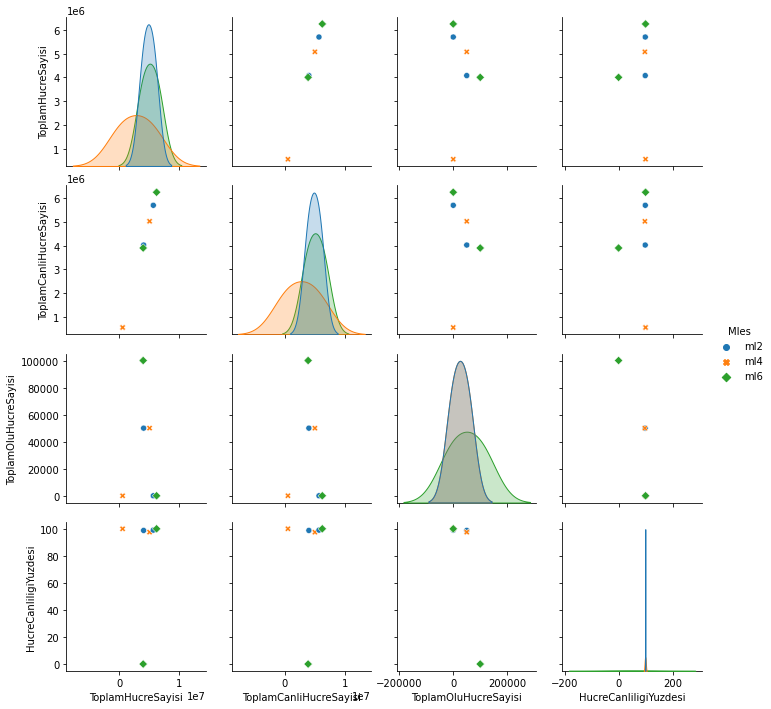

In [12]:
sns.pairplot(df, hue = "Mles", markers = ["o","X","D"]);

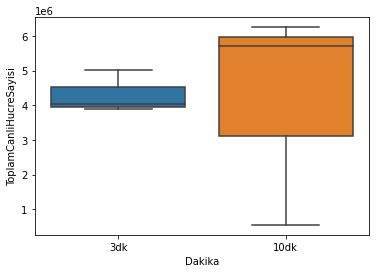

In [13]:
sns.boxplot(x = "Dakika", y = "ToplamCanliHucreSayisi", data = df);

## Normal Dağılım Varsayımı  - Shapiro-Wilks Test

In [14]:
print("T Test İstatistiği: " + str(shapiro(ToplamHucreSayisi)[0]))
print("Hesaplanan P-value: " + str(shapiro(ToplamHucreSayisi)[1]))

T Test İstatistiği: 0.8703359961509705
Hesaplanan P-value: 0.22754767537117004


In [15]:
print("T Test İstatistiği: " + str(shapiro(ToplamCanliHucreSayisi)[0]))
print("Hesaplanan P-value: " + str(shapiro(ToplamCanliHucreSayisi)[1]))

T Test İstatistiği: 0.8817814588546753
Hesaplanan P-value: 0.2773382365703583


In [16]:
print("T Test İstatistiği: " + str(shapiro(ToplamOluHucreSayisi)[0]))
print("Hesaplanan P-value: " + str(shapiro(ToplamOluHucreSayisi)[1]))

T Test İstatistiği: 0.8216156959533691
Hesaplanan P-value: 0.09113527834415436


#### H0 : Örnek dağılım ile teorik normal dağılım arasında istatistiki olarak anlamlı bir farklılık yoktur.
#### H1 : Örnek dağılım ile teorik normal dağılım arasında istatistiki olarak anlamlı bir farklılık vardır.



##### 0.22754767537117004 > 0.05
##### 0.2773382365703583  > 0.05
##### 0.09113527834415436  > 0.05   

#### KARAR :  H0 Hipotezi reddedilemez yani ToplamHucreSayisi,ToplamCanliHucreSayisi,ToplamOluHucreSayisi değişkenleri normal dağılmıştır.

## Varyans Homojenliği Varsayımı : Levene Test

In [17]:
stats.levene(df.ToplamHucreSayisi , df.ToplamHucreSayisi , df.ToplamOluHucreSayisi)

LeveneResult(statistic=2.998506098240764, pvalue=0.08026074546526414)

#### HO : Varyanslar homojendir.
#### H1 : Varyanslar homojen değildir.

#### KARAR : 0.08026074546526414 > 0.05 olduğundan H0 Hipotezi reddedilemez. Yani varyans homojenliği varsayımı sağlanmaktadır.

## HIPOTEZ TESTI : BAĞIMSIZ 2 ÖRNEKLEM T TESTİ

In [18]:
df

,ToplamHucreSayisi,ToplamCanliHucreSayisi,ToplamOluHucreSayisi,HucreCanliligiYuzdesi,Dakika,Mles
0,4075000,4025000,50000,98.773006,3dk,ml2
1,5075000,5025000,50000,97.500000,3dk,ml4
2,4000000,3900000,100000,0.000000,3dk,ml6
3,5700000,5700000,0,99.014778,10dk,ml2
4,550000,550000,0,100.000000,10dk,ml4
5,6250000,6250000,0,100.000000,10dk,ml6


In [24]:
A = pd.DataFrame([4075000,5075000,4000000])

In [25]:
B = pd.DataFrame([5700000,550000,6250000])

In [28]:
DK3 = np.arange(len(A))
DK3 = pd.DataFrame(DK3)
DK3[:] = "3DK"
A = pd.concat([A, DK3], axis = 1)

In [30]:
DK10 = np.arange(len(B))
DK10 = pd.DataFrame(DK10)
DK10[:] = "10DK"
B = pd.concat([B, DK10], axis = 1)

In [35]:
AB = pd.concat([A,B])
AB.columns = ["ToplamHucreSayisi","Dakika"]
AB

,ToplamHucreSayisi,Dakika
0,4075000,3DK
1,5075000,3DK
2,4000000,3DK
0,5700000,10DK
1,550000,10DK
2,6250000,10DK


In [38]:
A = pd.DataFrame([4075000,5075000,4000000])
B = pd.DataFrame([5700000,550000,6250000])
A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["Ucdakika","Ondakika"]

A_B.head()

,Ucdakika,Ondakika
0,4075000,5700000
1,5075000,550000
2,4000000,6250000


In [39]:
stats.ttest_ind(A_B["Ucdakika"], A_B["Ondakika"], equal_var = True)

Ttest_indResult(statistic=0.11723969243823402, pvalue=0.912321118731887)